# Standard PyTorch Workflow
This section is going to cover a standard PyTorch workflow.
The reference is https://www.learnpytorch.io/01_pytorch_workflow/.

## Major Steps
- Data
- Build model
- Train model
- Make prediction
- Save and load  PyTorch model 


### Data
We will use linear regression to create the data with known **parameter** and use PyTorch to see if we can build a model to esimate these parameters using **gradien descent**.

#### Split data into training and test sets
The dataset consists of 80% training data and 20% test data.

In [9]:
import torch

# create known parameters for a linear line function
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

x.shape, y.shape, x[:5], y[:5]
print(x[:5], y[:5])

# split data into training and testing
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])


(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

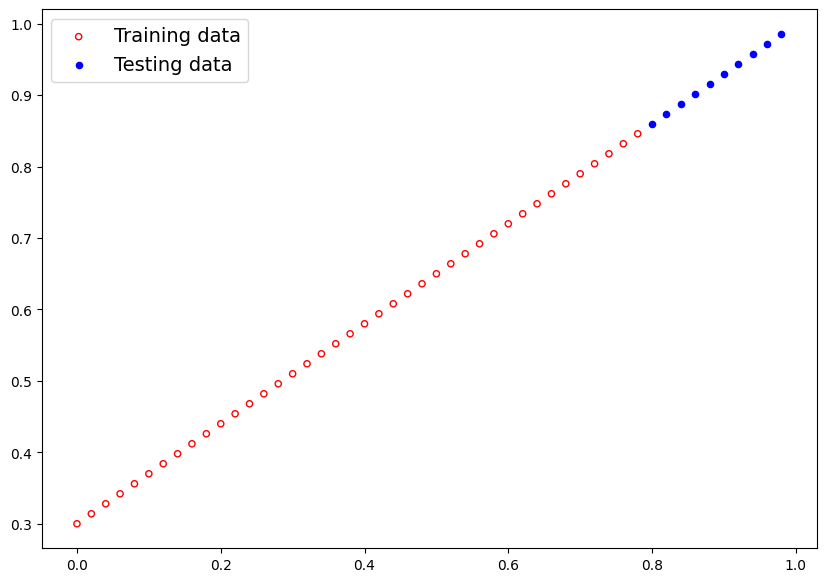

In [22]:
# plot data
import matplotlib.pyplot as plt

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))

    # plot training data
    plt.scatter(train_data, train_labels, edgecolors='r', marker='o', facecolors='none', s=20, label='Training data')

    # plot testing data
    plt.scatter(test_data, test_labels, c='b', s=20, label='Testing data')

    # add predictions if they exist
    if predictions is not None:
        plt.scatter(test_data, predictions, c='m', s=20, label='Predictions')

    # show the legend
    plt.legend(prop={'size': 14})

plot_predictions()

### Build model
Build a model to use the red hollow circles to predict the blue dots.

In [24]:
import torch.nn as nn

# create a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Parameter is a Tensor subclass
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # forward method defines the computation performed at every call
    # this is going to override the forward method in the nn.Module class
    def forward(self, x) -> torch.Tensor:
        return self.weight * x + self.bias

In [28]:
## check the contents of the model
# set the random seed
torch.manual_seed(42)

# create the instance of the model
model = LinearRegressionModel()

# check the model parameters
print("Parameters: ", list(model.parameters()))

# get the state dictionary of the model
print("State of the model: ", model.state_dict())

Parameters:  [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
State of the model:  OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


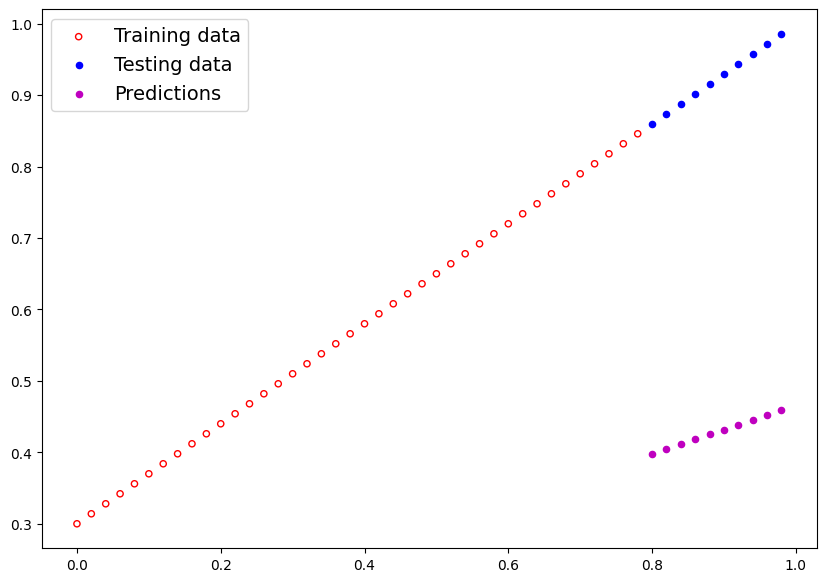

In [29]:
## make predictions with the model
with torch.inference_mode():
    y_pred = model(x_test)

# plot the predictions
plot_predictions(predictions=y_pred)